In [2]:
import numpy as np
from tensorflow import keras
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
print(x_train[:1])

x_train = x_train/255
print(x_train[:1])

x_test = x_test/255

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73
     0   0   1   4   0   0   0   0   1   1   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127
    62  54   0   0   0   1   3   4   0   0   3]
  [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176
   134 144 123  23   0   0   0   0  12  10   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207
   178 107 156 161 109  64  23  77 130  72  15]
  [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218
   216 216 163 127 121 122 146 141  88 172  66]
  [  0   0   0   0   0   0   0   0   0   1   1  

In [6]:
print(y_train[:5])

y_train = keras.utils.to_categorical(y_train, num_classes=10)
print(y_train[:5])

[9 0 0 3 0]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [7]:
from keras.models import Model
from keras import Sequential
from keras.layers import Conv1D, BatchNormalization, Dense, Flatten, Dropout
from keras import Input

In [8]:
i_layer = Input(shape=(28,28))

x = Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(i_layer)
x = BatchNormalization(momentum=0.9)(x)
x = Dropout(0.2)(x)

x = Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization(momentum=0.9)(x)
x = Dropout(0.2)(x)

x = Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization(momentum=0.9)(x)
x = Dropout(0.2)(x)

# Additional
# x = Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(x)
# x = BatchNormalization(momentum = 0.9)(x)
# x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(0.2)(x)

o_layer = Dense(units=10, activation='softmax')(x)

model = Model(i_layer, o_layer)

In [9]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 28, 32)         │         2,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 28, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 28, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,418 (489.91 KB)

 Trainable params: 125,226 (489.16 KB)

 Non-trainable params: 192 (768.00 B)

In [10]:
model.fit(x_train, y_train, batch_size=1000, epochs=200, validation_split=0.2, verbose=2)

Epoch 1/200
48/48 - 7s - 146ms/step - accuracy: 0.6689 - loss: 0.9734 - val_accuracy: 0.8015 - val_loss: 0.5419
Epoch 2/200
48/48 - 2s - 48ms/step - accuracy: 0.8045 - loss: 0.5441 - val_accuracy: 0.8468 - val_loss: 0.4173
Epoch 3/200
48/48 - 2s - 46ms/step - accuracy: 0.8299 - loss: 0.4710 - val_accuracy: 0.8597 - val_loss: 0.3825
Epoch 4/200
48/48 - 2s - 47ms/step - accuracy: 0.8439 - loss: 0.4291 - val_accuracy: 0.8658 - val_loss: 0.3679
Epoch 5/200
48/48 - 2s - 46ms/step - accuracy: 0.8519 - loss: 0.4036 - val_accuracy: 0.8736 - val_loss: 0.3473
Epoch 6/200
48/48 - 2s - 46ms/step - accuracy: 0.8612 - loss: 0.3831 - val_accuracy: 0.8790 - val_loss: 0.3358
Epoch 7/200
48/48 - 2s - 46ms/step - accuracy: 0.8654 - loss: 0.3720 - val_accuracy: 0.8798 - val_loss: 0.3304
Epoch 8/200
48/48 - 2s - 46ms/step - accuracy: 0.8698 - loss: 0.3584 - val_accuracy: 0.8850 - val_loss: 0.3187
Epoch 9/200
48/48 - 2s - 47ms/step - accuracy: 0.8731 - loss: 0.3434 - val_accuracy: 0.8834 - val_loss: 0.3185


In [11]:
prediction = model.predict(x_test)
print(prediction[:5])

prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])
print(y_test[:5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[2.0770669e-18 9.3698718e-17 8.6780833e-18 3.5258773e-15 2.0708802e-18
  7.9604909e-08 4.1554937e-17 6.3382540e-06 1.9229987e-12 9.9999356e-01]
 [2.4885825e-08 1.1192396e-18 9.9999523e-01 3.5552662e-11 3.2710949e-07
  4.1776223e-18 4.4346821e-06 4.4878139e-21 1.6899441e-15 2.6024635e-22]
 [2.2166937e-15 1.0000000e+00 4.5616410e-20 5.1764496e-15 8.1925971e-20
  3.7214852e-27 4.4751741e-18 2.3153087e-29 3.7091004e-26 5.4619874e-27]
 [1.0189112e-14 1.0000000e+00 3.2984990e-20 1.3059188e-11 1.5649914e-22
  1.6515151e-24 2.5707597e-17 3.4190789e-28 2.4499426e-23 2.2370202e-24]
 [5.9800418e-03 6.5994815e-10 1.0601332e-03 2.3636798e-04 4.1197974e-04
  1.1424624e-10 9.9231142e-01 1.3639557e-12 2.6723881e-10 1.4369523e-12]]
[9 2 1 1 6]
[9 2 1 1 6]


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
ac_score = accuracy_score(y_test, prediction)
print(ac_score)

conf_matrix = confusion_matrix(y_test, prediction)
print(conf_matrix)

0.91
[[843   2  15  25   5   2 100   0   8   0]
 [  2 983   0  11   1   0   1   0   2   0]
 [ 13   1 847  12  53   0  73   0   1   0]
 [ 16   6   8 914  33   0  20   0   3   0]
 [  0   0  51  21 865   0  62   0   1   0]
 [  0   0   0   1   0 972   0  17   1   9]
 [106   4  37  19  60   0 761   0  13   0]
 [  0   0   0   0   0   7   0 978   0  15]
 [  1   1   4   2   1   1   2   5 983   0]
 [  0   0   0   0   0   7   1  38   0 954]]


In [14]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'actual')

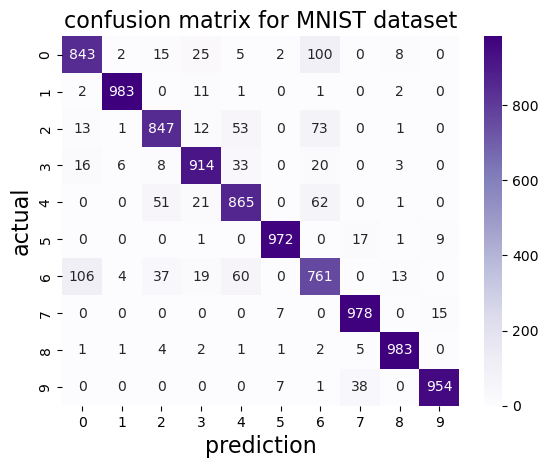

In [15]:
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
ax.set_title('confusion matrix for MNIST dataset', fontsize=16)
ax.set_xlabel('prediction', fontsize=16)
ax.set_ylabel('actual', fontsize=16)

In [15]:
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
import numpy as np
from tensorflow import keras

# Load your trained Keras model
#model = keras.models.load_model("model.h5")

# Create a Tkinter window
class App(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Draw a Digit")
        self.canvas = tk.Canvas(self, width=280, height=280, bg='white')
        self.canvas.pack()
        self.button = tk.Button(self, text="Predict", command=self.predict)
        self.button.pack()
        self.clear_button = tk.Button(self, text="Clear", command=self.clear)
        self.clear_button.pack()

        self.canvas.bind("<B1-Motion>", self.paint)
        self.image1 = Image.new("L", (280, 280), color=255)
        self.draw = ImageDraw.Draw(self.image1)

    def paint(self, event):
        x1, y1 = (event.x - 8), (event.y - 8)
        x2, y2 = (event.x + 8), (event.y + 8)
        self.canvas.create_oval(x1, y1, x2, y2, fill='black')
        self.draw.ellipse([x1, y1, x2, y2], fill=0)

    def clear(self):
        self.canvas.delete("all")
        self.draw.rectangle([0, 0, 280, 280], fill=255)

    def predict(self):
        img = self.image1.resize((28, 28))
        img = ImageOps.invert(img)
        img = np.array(img).astype(np.float32) / 255.0
        img = np.expand_dims(img, axis=0)  # Keras expects (batch_size, height, width)

        output = model.predict(img)
        pred = np.argmax(output)

        print(f"Predicted digit: {pred}")
        self.title(f"Predicted: {pred}")


# Run the app
app = App()
app.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted digit: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted digit: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37m

In [16]:
model.save('../models/mnist-fashion-model.h5')